Prac 6:Write a program to classify the numerals (between 0-9) using perceptron network.

In [ ]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

digits = load_digits()

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

clf = Perceptron(max_iter=1000)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(X_test)
print(y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


SC PRac7:Write a program to train a Madaline to perform OR function using MR-I algorithm.

In [ ]:
import numpy as np

# Define the activation function
def activation(x):
    return np.where(x>=0, 1, -1)

# Define the Madaline class
class Madaline:
    def __init__(self, input_dim, output_dim, num_units):
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.num_units = num_units
        self.weights = [np.random.randn(input_dim, output_dim) for i in range(num_units)]
        self.biases = [np.random.randn(output_dim) for i in range(num_units)]
        self.learning_rate = 0.1
        self.momentum = 0.9
        self.delta_w = [np.zeros((input_dim, output_dim)) for i in range(num_units)]
        self.delta_b = [np.zeros(output_dim) for i in range(num_units)]

    # Train the Madaline using MR-I algorithm
    def train(self, X, y, epochs):
        for epoch in range(epochs):
            for i in range(len(X)):
                # Forward pass
                outputs = [activation(np.dot(X[i], self.weights[j]) + self.biases[j]) for j in range(self.num_units)]
                output = np.sum(outputs, axis=0)
                
                # Compute the error
                error = y[i] - output
                
                # Backward pass
                for j in range(self.num_units):
                    delta = self.learning_rate * error * X[i].reshape(-1,1)
                    self.delta_w[j] = self.momentum * self.delta_w[j] + delta
                    self.weights[j] += self.delta_w[j]
                    
                    delta = self.learning_rate * error
                    self.delta_b[j] = self.momentum * self.delta_b[j] + delta
                    self.biases[j] += self.delta_b[j]

    # Predict the output for a given input
    def predict(self, X):
        outputs = [activation(np.dot(X, self.weights[j]) + self.biases[j]) for j in range(self.num_units)]
        return np.sum(outputs, axis=0)

# Define the OR function dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([-1, 1, 1, 1])

# Create a Madaline with 2 input neurons, 1 output neuron, and 2 Adaline units
madaline = Madaline(2, 1, 2)

# Train the Madaline for 100 epochs
madaline.train(X, y, 100)

# Predict the output for the inputs
print(madaline.predict(np.array([[0, 0], [0, 1], [1, 0], [1, 1]])))

[[-2]
 [ 0]
 [ 0]
 [ 2]]


SC Prac8:Implement XOR function using McCulloch-Pitts neuron. (Consider binary data).

In [ ]:
import numpy as np

def activation(x):
    return np.where(x >= 0, 1, 0)

class McCullochPittsNeuron:
    def __init__(self, weights, threshold):
        self.weights = weights
        self.threshold = threshold

    def forward(self, x):
        x = np.dot(x, self.weights)
        return activation(x - self.threshold)

class XOR:
    def __init__(self):
        self.n1 = McCullochPittsNeuron(np.array([1, 1]), 1)
        self.n2 = McCullochPittsNeuron(np.array([-1, -1]), -1)
        self.n3 = McCullochPittsNeuron(np.array([1, -1]), 0)

    def forward(self, x):
        x1 = self.n1.forward(x)
        x2 = self.n2.forward(x)
        x = np.array([x1, x2])
        return self.n3.forward(x)

x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
xor = XOR()

for i in range(len(x)):
    print(f"Input: {x[i]}, Output: {xor.forward(x[i])}")

Input: [0 0], Output: 0
Input: [0 1], Output: 1
Input: [1 0], Output: 1
Input: [1 1], Output: 1


SC Prac9:Write a program to classify the two-dimensional input pattern shown in figure using Perceptron network. The symbol “*” indicates the data representation to be +1 and “#” indicates data to be -1. For the pattern I, the target is +1 and for the pattern H, the target is -1.

In [ ]:
import numpy as np

# Define the input patterns and their targets
I = np.array([[1, 1, 1], [0, 1, 0], [1, 1, 1]])
H = np.array([[1, 0, 1], [1, 1, 1], [1, 0, 1]])
I_target = 1
H_target = -1

# Flatten the input patterns
I_flat = I.flatten()
H_flat = H.flatten()

# Define the Perceptron class
class Perceptron:
    def __init__(self, input_dim):
        self.weights = np.random.randn(input_dim)
        self.bias = np.random.randn()
        self.learning_rate = 0.1

    # Train the perceptron using the input data and target label
    def train(self, X, y, epochs):
        for epoch in range(epochs):
            for i in range(len(X)):
                # Forward pass
                output = np.where(np.dot(X[i], self.weights) + self.bias >= 0, 1, -1)

                # Compute the error
                error = y[i] - output

                # Backward pass
                delta_w = self.learning_rate * X[i] * error
                self.weights += delta_w
                self.bias += self.learning_rate * error

    # Predict the output for a given input
    def predict(self, X):
        output = np.where(np.dot(X, self.weights) + self.bias >= 0, 1, -1)
        return output

# Create a perceptron with 9 input neurons
perceptron = Perceptron(9)

# Train the perceptron for 100 epochs on the I and H patterns
X = np.array([I_flat, H_flat])
y = np.array([I_target, H_target])
perceptron.train(X, y, 100)

# Predict the output for the I and H patterns
I_pred = perceptron.predict(I_flat)
H_pred = perceptron.predict(H_flat)
print(f"Prediction for pattern I: {I_pred}")
print(f"Prediction for pattern H: {H_pred}")

Prediction for pattern I: 1
Prediction for pattern H: -1


SC Prac10:Write a program to classify the data using back propagation neural network.(consider Breast cancer dataset)

In [ ]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale the data to zero mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network model
model = Sequential()
model.add(Dense(units=16, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the neural network model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

Epoch 1/50
15/15 [==============================] - 1s 15ms/step - loss: 0.6911 - accuracy: 0.6637 - val_loss: 0.5441 - val_accuracy: 0.7105
Epoch 2/50
15/15 [==============================] - 0s 5ms/step - loss: 0.4540 - accuracy: 0.8286 - val_loss: 0.3948 - val_accuracy: 0.8772
Epoch 3/50
15/15 [==============================] - 0s 5ms/step - loss: 0.3239 - accuracy: 0.9231 - val_loss: 0.3205 - val_accuracy: 0.9035
Epoch 4/50
15/15 [==============================] - 0s 4ms/step - loss: 0.2614 - accuracy: 0.9473 - val_loss: 0.2773 - val_accuracy: 0.9035
Epoch 5/50
15/15 [==============================] - 0s 4ms/step - loss: 0.2243 - accuracy: 0.9560 - val_loss: 0.2487 - val_accuracy: 0.9035
Epoch 6/50
15/15 [==============================] - 0s 3ms/step - loss: 0.1983 - accuracy: 0.9604 - val_loss: 0.2288 - val_accuracy: 0.9123
Epoch 7/50
15/15 [==============================] - 0s 3ms/step - loss: 0.1790 - accuracy: 0.9626 - val_loss: 0.2132 - val_accuracy: 0.9123
Epoch 8/50
15/15 [=

SC Prac 11:Write a suitable program for Classification of a 4-class problem with a 2-neuron perceptron.

In [ ]:
import numpy as np

# Define the activation function
def activation(x):
    return np.where(x>=0, 1, 0)

# Define the Perceptron class
class Perceptron:
    def __init__(self, input_dim, output_dim):
        self.weights = np.random.randn(input_dim, output_dim)
        self.bias = np.random.randn(output_dim)
        self.learning_rate = 0.1

    # Train the perceptron using the input data and target labels
    def train(self, X, y, epochs):
        for epoch in range(epochs):
            for i in range(len(X)):
                # Forward pass
                output = activation(np.dot(X[i], self.weights) + self.bias)

                # Compute the error
                error = y[i] - output

                # Backward pass
                delta_w = self.learning_rate * np.outer(X[i], error)
                self.weights += delta_w
                self.bias += self.learning_rate * error

    # Predict the output for a given input
    def predict(self, X):
        output = activation(np.dot(X, self.weights) + self.bias)
        return output

# Define the input data
X = np.array([[0,0], [0,1], [1,0], [1,1]])

# Define the target labels
Y = np.array([[1,0], [0,1], [0,1], [1,0]])

# Create a perceptron with 2 input neurons and 2 output neurons
perceptron = Perceptron(2, 2)

# Train the perceptron for 100 epochs
perceptron.train(X, Y, 100)

# Predict the output for the test inputs
Y_pred = perceptron.predict(X)

# Print the predicted output
print(Y_pred)

[[0 1]
 [0 1]
 [1 0]
 [1 0]]


Prac 12:Write a program to show the various fuzzy membership functions. (Triangular, Trapezoidal)

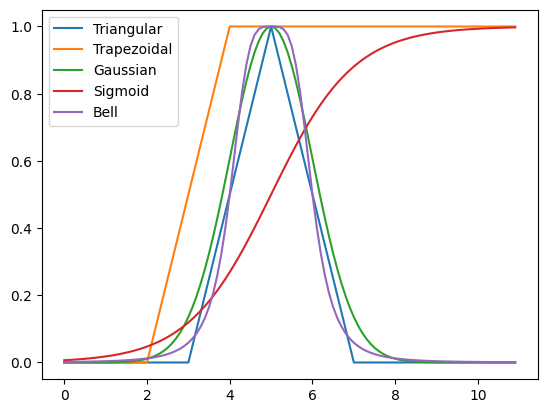

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the input range
x = np.arange(0, 11, 0.1)

# Define the fuzzy membership functions
# Triangular membership function
def triangular(x, a, b, c):
    return np.maximum(np.minimum((x - a) / (b - a), (c - x) / (c - b)), 0)

# Trapezoidal membership function
def trapezoidal(x, a, b, c, d):
    return np.maximum(np.minimum((x - a) / (b - a), 1, (d - x) / (d - c)), 0)

# Gaussian membership function
def gaussian(x, mean, sigma):
    return np.exp(-0.5 * ((x - mean) / sigma)**2)

# Sigmoid membership function
def sigmoid(x, alpha, beta):
    return 1 / (1 + np.exp(-alpha * (x - beta)))

# Bell membership function
def bell(x, a, b, c):
    return 1 / (1 + np.abs((x - c) / a)**(2 * b))

# Plot the fuzzy membership functions
plt.plot(x, triangular(x, 3, 5, 7), label='Triangular')
plt.plot(x, trapezoidal(x, 2, 4, 6, 8), label='Trapezoidal')
plt.plot(x, gaussian(x, 5, 1), label='Gaussian')
plt.plot(x, sigmoid(x, 1, 5), label='Sigmoid')
plt.plot(x, bell(x, 1, 2, 5), label='Bell')
plt.legend()
plt.show()

SC Prac 13:Implementation of Fuzzy Relations (Max-Min Composition)

In [ ]:
import numpy as np

def max_min_composition(A, B):
    """
    Computes the max-min composition of two fuzzy relations A and B.
    
    Parameters:
    A (2D numpy array): Fuzzy relation on X x Y
    B (2D numpy array): Fuzzy relation on Y x Z
    
    Returns:
    C (2D numpy array): Fuzzy relation on X x Z
    """
    X, Y = A.shape
    Y2, Z = B.shape
    assert Y == Y2, "Incompatible shapes"
    
    C = np.zeros((X, Z))
    for x in range(X):
        for z in range(Z):
            C[x, z] = np.max(np.min(A[x, :] * B[:, z], axis=0))
    
    return C

Prac 14:Implement various Fuzzy Operations.

In [1]:
A = dict()
B = dict()
Y = dict()
A = {"a": 0.2, "b": 0.3, "c": 0.6, "d": 0.6}
B = {"a": 0.9, "b": 0.9, "c": 0.4, "d": 0.5}
print('The First Fuzzy Set is :', A)
print('The Second Fuzzy Set is :', B)
 
 
for A_key, B_key in zip(A, B):
    A_value = A[A_key]
    B_value = B[B_key]
    if A_value > B_value:
        Y[A_key] = A_value
    else:
        Y[B_key] = B_value    
print('Fuzzy Set Union is :', Y)
for A_key, B_key in zip(A, B):
    A_value = A[A_key]
    B_value = B[B_key]
    if A_value < B_value:
        Y[A_key] = A_value
    else:
        Y[B_key] = B_value
print('Fuzzy Set Intersection is :', Y)
for A_key in A:
   Y[A_key]= 1-A[A_key]      
print('Fuzzy Set Complement A is :', Y)
for B_key in B:
   Y[B_key]= 1-B[B_key]      
print('Fuzzy Set Complement is B :', Y)


The First Fuzzy Set is : {'a': 0.2, 'b': 0.3, 'c': 0.6, 'd': 0.6}
The Second Fuzzy Set is : {'a': 0.9, 'b': 0.9, 'c': 0.4, 'd': 0.5}
Fuzzy Set Union is : {'a': 0.9, 'b': 0.9, 'c': 0.6, 'd': 0.6}
Fuzzy Set Intersection is : {'a': 0.2, 'b': 0.3, 'c': 0.4, 'd': 0.5}
Fuzzy Set Complement A is : {'a': 0.8, 'b': 0.7, 'c': 0.4, 'd': 0.4}
Fuzzy Set Complement is B : {'a': 0.09999999999999998, 'b': 0.09999999999999998, 'c': 0.6, 'd': 0.5}


Prac 15:Write a program to find the given Fuzzy relation is equivalence or not.

In [2]:
def is_equivalence_relation(R):
    # Check reflexivity
    for x in R.keys():
        if R[x][x] != 1:
            return False
    # Check symmetry
    for x in R.keys():
        for y in R.keys():
            if R[x][y] != R[y][x]:
                return False
    # Check transitivity
    for x in R.keys():
        for y in R.keys():
            for z in R.keys():
                if R[x][y] >= R[y][z] and R[x][y] >= R[x][z]:
                    if R[x][z] < min(R[x][y], R[y][z]):
                        return False
    return True
R = {'a': {'a': 1, 'b': 0.5, 'c': 0.8},
     'b': {'a': 0.5, 'b': 1, 'c': 0.6},
     'c': {'a': 0.8, 'b': 0.6, 'c': 1}}

if is_equivalence_relation(R):
    print("The given fuzzy relation is an equivalence relation.")
else:
    print("The given fuzzy relation is not an equivalence relation.")


The given fuzzy relation is not an equivalence relation.


Prac 18:Write a program for maximizing f(x)=x^2 using GA, where x is the range from 0 to 20. Perform 5 iterations only.

In [3]:
import random
# Define the fitness function
def fitness(x):
    return x ** 2

# Define the genetic algorithm parameters
POPULATION_SIZE = 50
MUTATION_RATE = 0.1
CROSSOVER_RATE = 0.8
ELITISM = True

# Initialize the population
population = []
for i in range(POPULATION_SIZE):
    individual = {'x': random.uniform(0, 20)}
    individual['fitness'] = fitness(individual['x'])
    population.append(individual)

# Perform 5 iterations
for iteration in range(5):
    # Sort the population by fitness
    population.sort(key=lambda x: x['fitness'], reverse=True)
    
    # Print the best solution
    print("Iteration {}: Best solution = {}".format(iteration+1, population[0]['x']))
    
    # Select parents for crossover
    parents = []
    if ELITISM:
        parents.append(population[0])
    for i in range(POPULATION_SIZE-len(parents)):
        parent1 = random.choice(population[:int(POPULATION_SIZE/2)])
        parent2 = random.choice(population[:int(POPULATION_SIZE/2)])
        parents.append(parent1 if parent1['fitness'] > parent2['fitness'] else parent2)
    
    # Create offspring using crossover
    offspring = []
    for i in range(int(POPULATION_SIZE/2)):
        parent1 = parents[i]
        parent2 = parents[len(parents)-i-1]
        if random.random() < CROSSOVER_RATE:
            child1 = {'x': (parent1['x'] + parent2['x']) / 2}
            child2 = {'x': (parent1['x'] + parent2['x']) / 2}
            child1['fitness'] = fitness(child1['x'])
            child2['fitness'] = fitness(child2['x'])
            offspring.append(child1)
            offspring.append(child2)
        else:
            offspring.append(parent1)
            offspring.append(parent2)
    
    # Mutate the offspring
    for individual in offspring:
        if random.random() < MUTATION_RATE:
            individual['x'] = random.uniform(0, 20)
            individual['fitness'] = fitness(individual['x'])
    
    # Replace the population with the offspring
    population = parents + offspring

# Print the best solution found overall
population.sort(key=lambda x: x['fitness'], reverse=True)
print("Best solution found = {}".format(population[0]['x']))


Iteration 1: Best solution = 19.631993008243104
Iteration 2: Best solution = 19.765328870525924
Iteration 3: Best solution = 19.765328870525924
Iteration 4: Best solution = 19.765328870525924
Iteration 5: Best solution = 19.765328870525924
Best solution found = 19.765328870525924


Prac 19:Use gatool and minimize the quadratic equation f(x)= x^2+3x+2 ;-6≤x≤0.

In [ ]:
import random

# Define the fitness function
def fitness(x):
    return x ** 2 + 3 * x + 2

# Define the genetic algorithm parameters
POPULATION_SIZE = 50
MUTATION_RATE = 0.1
CROSSOVER_RATE = 0.8
ELITISM = True
LOWER_BOUND = -6
UPPER_BOUND = 0

# Initialize the population
population = []
for i in range(POPULATION_SIZE):
    individual = {'x': random.uniform(LOWER_BOUND, UPPER_BOUND)}
    individual['fitness'] = fitness(individual['x'])
    population.append(individual)

# Define the selection function
def selection(population):
    sorted_pop = sorted(population, key=lambda x: x['fitness'])
    fitness_sum = sum(individual['fitness'] for individual in population)
    selection_prob = [(individual['fitness'] / fitness_sum) for individual in sorted_pop]
    cumulative_prob = [sum(selection_prob[:i+1]) for i in range(len(selection_prob))]
    selected = []
    for i in range(len(population)):
        r = random.random()
        for j in range(len(cumulative_prob)):
            if r < cumulative_prob[j]:
                selected.append(sorted_pop[j])
                break
    return selected

for generation in range(50):
    population.sort(key=lambda x: x['fitness'])
    
    parents = []
    if ELITISM:
        parents.append(population[0])
    parents += selection(population)
    while len(parents) < POPULATION_SIZE:
        parents += selection(population)
    
    offspring = []
    for i in range(int(POPULATION_SIZE/2)):
        parent1 = parents[i]
        parent2 = parents[len(parents)-i-1]
        if random.random() < CROSSOVER_RATE:
            child1 = {'x': (parent1['x'] + parent2['x']) / 2}
            child2 = {'x': (parent1['x'] + parent2['x']) / 2}
            child1['fitness'] = fitness(child1['x'])
            child2['fitness'] = fitness(child2['x'])
            offspring.append(child1)
            offspring.append(child2)
        else:
            offspring.append(parent1)
            offspring.append(parent2)
    for individual in offspring:
        if random.random() < MUTATION_RATE:
            individual['x'] += random.uniform(-1, 1)
            individual['x'] = max(LOWER_BOUND, min(UPPER_BOUND, individual['x']))
            individual['fitness'] = fitness(individual['x'])
    population = parents + offspring
population.sort(key=lambda x: x['fitness'])
print("Best solution found: x = {:.4f}, f(x) = {:.4f}".format(population[0]['x'], population[0]['fitness']))


Prac 20:Use gatoolto maximizethe function f(x_1,x_2 )=4x_1+5x_2, within the range 1 to 2.

In [ ]:
import random
min_value = 1
max_value = 2
pop_size = 50
max_gen = 5
def fitness(x1, x2):
    return 4*x1 + 5*x2

def mutate(chromosome):
    for i in range(len(chromosome)):
        if random.random() < 0.01:
            chromosome[i] = random.uniform(min_value, max_value)
population = []
for i in range(pop_size):
    chromosome = [random.uniform(min_value, max_value) for _ in range(2)]
    population.append(chromosome)
for gen in range(max_gen):
    fitness_values = [fitness(chromosome[0], chromosome[1]) for chromosome in population]
    selected_indices = []
    for _ in range(pop_size):
        subset = random.sample(range(pop_size), 5)
        selected_index = max(subset, key=lambda i: fitness_values[i])
        selected_indices.append(selected_index)

    offspring = []
    for i in range(pop_size):
        parent1 = population[selected_indices[i]]
        parent2 = population[selected_indices[(i+1)%pop_size]]
        crossover_point = random.randint(1, len(parent1) - 1)
        child = parent1[:crossover_point] + parent2[crossover_point:]
        mutate(child)
        offspring.append(child)
    population = offspring
    best_fitness = max(fitness_values)
    print(f"Generation {gen}: Best Fitness = {best_fitness}")
best_chromosome = max(population, key=lambda chromosome: fitness(chromosome[0], chromosome[1]))
print(f"Best Solution: x1 = {best_chromosome[0]}, x2 = {best_chromosome[1]}, f(x1,x2) = {fitness(best_chromosome[0], best_chromosome[1])}")
